# Procesamiento del Lenguaje Natural
## Práctica 1

Dado el corpus proporcionado, obtener la curva de Zipf de las palabras en escala logarítmica.

In [97]:
import os
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
%matplotlib inline
#nltk.download()

In [2]:
# Obtener el nombre de los corpus
file_path = 'CorpusDocs/'
file_names = sorted(os.listdir(file_path))
file_names[:4]

['acustica (1).txt',
 'acustica (2).txt',
 'acustica (3).txt',
 'acustica (4).txt']

In [3]:
# Lista para almacenar los corpus originales
corpus = []

In [4]:
# Leer los archivos y guardar el texto en la lista de corpus
for name in file_names:
    with open(file_path + name, 'rt') as file:
        text = file.read().lower()
        corpus.append(text)

In [5]:
corpus[0]

'onda sonora\nondes compression 2d 20 petit.gif\nuna onda sonora es una onda longitudinal que transmite lo que se asocia con sonido. si se propaga en un medio elástico y continuo genera una variación local de presión o densidad, que se transmite en forma de onda esférica periódica o cuasiperiódica. mecánicamente las ondas sonoras son un tipo de onda elástica.\nlas variaciones de presión, humedad o temperatura del medio, producen el desplazamiento de las moléculas que lo forman. cada molécula transmite la vibración a las que se encuentren en su vecindad, provocando un movimiento en cadena. esa propagación del movimiento de las moléculas del medio, producen en el oído humano una sensación descrita como sonido.\n\níndice  [ocultar] \n1 propagación de ondas\n1.1 modo de propagación\n1.2 propagación en medios\n2 percepción humana de las ondas sonoras\n3 véase también\npropagación de ondas[editar · editar código]\n\nmodo de propagación[editar · editar código]\nel sonido está formado por onda

### 1) Limpieza de los corpus
Para limpiar cada uno de los corpus se usará el módulo NLTK el cual nos permite obtener los tokens de una sequencia de caractetes. 

Posteriormente, los tokens serán validados para conservar únicamente aquellos que sean elementos léxicos.


In [8]:
'''
    Obtener los tokens y conservar unicamente a los que son validos:
        * Elementos en el alfabeto [a-z]
        * No son letras que no tienen significado en una oracion
'''
forbidden = re.compile('(b|c|d|f|g|h|j|k|l|m|n|p|q|r|s|t|u|v|w|z)')    # Letras no validas
corpus_tokens = []                                                     # Tokens de todos los archivos
file_tokens = []                                                       # Tokens de cada archivo                                                           

for text in corpus:
    tokens = nltk.word_tokenize(text)
    for token in tokens:
        if token.isalpha() and not forbidden.fullmatch(token):
            file_tokens.append(token)
    corpus_tokens.append(file_tokens.copy())
    file_tokens.clear()

In [9]:
' '.join(corpus_tokens[0])

'onda sonora ondes compression una onda sonora es una onda longitudinal que transmite lo que se asocia con sonido si se propaga en un medio elástico y continuo genera una variación local de presión o densidad que se transmite en forma de onda esférica periódica o cuasiperiódica mecánicamente las ondas sonoras son un tipo de onda elástica las variaciones de presión humedad o temperatura del medio producen el desplazamiento de las moléculas que lo forman cada molécula transmite la vibración a las que se encuentren en su vecindad provocando un movimiento en cadena esa propagación del movimiento de las moléculas del medio producen en el oído humano una sensación descrita como sonido índice ocultar propagación de ondas modo de propagación propagación en medios percepción humana de las ondas sonoras véase también propagación de ondas editar editar código modo de propagación editar editar código el sonido está formado por ondas mecánicas elásticas longitudinales ondas de compresión en un medi

### 2) Aplicar algoritmo de Stemming

In [10]:
from nltk.stem.snowball import SnowballStemmer

In [13]:
# Creacion del objeto para realizar stemming de Porter
stemmer = SnowballStemmer("spanish")

In [14]:
'''
    Aplicar algoritmo de Stemming para el idioma español
    a cada uno de los tokens de los 100 archivos de texto
'''
corpus_stems = []
file_stems = []

for tokens in corpus_tokens:
    for token in tokens:
        file_stems.append(stemmer.stem(token))
    corpus_stems.append(file_stems.copy())
    file_stems.clear()

In [16]:
' '.join(corpus_stems[0])

'onda sonor ondes compression una onda sonor es una onda longitudinal que transmit lo que se asoci con son si se propag en un medi elast y continu gener una variacion local de presion o densid que se transmit en form de onda esfer period o cuasiperiod mecan las ondas sonor son un tip de onda elast las variacion de presion humed o temperatur del medi produc el desplaz de las molecul que lo form cad molecul transmit la vibracion a las que se encuentr en su vecind provoc un movimient en caden esa propag del movimient de las molecul del medi produc en el oid human una sensacion descrit com son indic ocult propag de ondas mod de propag propag en medi percepcion human de las ondas sonor veas tambien propag de ondas edit edit codig mod de propag edit edit codig el son esta form por ondas mecan elast longitudinal ondas de compresion en un medi eso signif que par propag precis de un medi material air agu cuerp sol que transmit la perturb viaj mas rap en los sol lueg en los liqu aun mas lent en 

### 3) Frecuencia de los tipos

In [49]:
# Almacenar las frecuencias de cada tipo por texto en un diccionario
corpus_freqs = {}
freqs = {}
n = len(file_names)

for cstems, cname in zip(corpus_stems, file_names):
    for stem in cstems:
        if stem not in freqs:
            freqs[stem] = 1
        else:
            freqs[stem] += 1
    corpus_freqs[cname] = freqs.copy()
    freqs.clear()

In [52]:
corpus_freqs[file_names[1]]

{'energ': 57,
 'sonor': 23,
 'la': 72,
 'o': 11,
 'acust': 41,
 'es': 13,
 'que': 19,
 'transmit': 6,
 'transport': 1,
 'las': 14,
 'ondas': 5,
 'proced': 1,
 'de': 95,
 'vibracional': 1,
 'del': 21,
 'foc': 1,
 'y': 24,
 'se': 13,
 'propag': 6,
 'a': 31,
 'particul': 5,
 'medi': 14,
 'atravies': 2,
 'en': 21,
 'form': 2,
 'cinet': 2,
 'movimient': 4,
 'potencial': 2,
 'cambi': 1,
 'presion': 7,
 'produc': 4,
 'dich': 1,
 'al': 7,
 'irse': 1,
 'el': 27,
 'son': 11,
 'traves': 3,
 'veloc': 8,
 'onda': 3,
 'per': 1,
 'una': 13,
 'part': 5,
 'disip': 8,
 'suel': 1,
 'ten': 1,
 'valor': 1,
 'absolut': 1,
 'baj': 1,
 'su': 2,
 'unid': 7,
 'med': 4,
 'joul': 1,
 'aunqu': 1,
 'pued': 3,
 'calcul': 4,
 'otras': 2,
 'magnitud': 2,
 'com': 5,
 'intens': 6,
 'tambien': 4,
 'relacion': 1,
 'densid': 9,
 'fluj': 13,
 'definicion': 1,
 'superfici': 4,
 'da': 1,
 'dond': 2,
 'funcion': 2,
 'punt': 2,
 'escog': 1,
 'tiemp': 3,
 'interval': 1,
 'durant': 1,
 'pretend': 1,
 'indic': 1,
 'ocult': 1,
 'co

### 4) Ordenar por rango estadístico (mayor a menor)

In [83]:
corpus_ordered = {}

for fname in file_names:
    d = sorted(corpus_freqs[file_names[0]].items(), key=lambda d: d[1], reverse=True)
    corpus_ordered[fname] = d

In [108]:
corpus_ordered[file_names[0]][0][1]

62

In [109]:
corpus_ordered[file_names[0]]

[('de', 62),
 ('la', 40),
 ('que', 27),
 ('en', 25),
 ('propag', 20),
 ('ondas', 19),
 ('el', 18),
 ('onda', 17),
 ('sonor', 17),
 ('y', 17),
 ('se', 15),
 ('las', 15),
 ('son', 14),
 ('una', 12),
 ('un', 12),
 ('medi', 12),
 ('a', 12),
 ('es', 11),
 ('edit', 10),
 ('del', 8),
 ('los', 8),
 ('veloc', 8),
 ('frecuenci', 8),
 ('por', 7),
 ('par', 7),
 ('transmit', 6),
 ('elast', 6),
 ('presion', 5),
 ('o', 5),
 ('tambien', 5),
 ('codig', 5),
 ('no', 5),
 ('pued', 5),
 ('hz', 5),
 ('form', 4),
 ('produc', 4),
 ('vibracion', 4),
 ('human', 4),
 ('sol', 4),
 ('direccion', 4),
 ('longitudinal', 3),
 ('lo', 3),
 ('con', 3),
 ('esfer', 3),
 ('molecul', 3),
 ('cad', 3),
 ('movimient', 3),
 ('percepcion', 3),
 ('mas', 3),
 ('estas', 3),
 ('al', 3),
 ('dond', 3),
 ('distanci', 3),
 ('cas', 3),
 ('diferent', 3),
 ('fas', 3),
 ('si', 2),
 ('gener', 2),
 ('variacion', 2),
 ('period', 2),
 ('mecan', 2),
 ('tip', 2),
 ('desplaz', 2),
 ('su', 2),
 ('oid', 2),
 ('sensacion', 2),
 ('com', 2),
 ('mod', 2)

### 5) Graficación del diagrama de dispersión rango-frecuencia (escala logarítmica)

In [113]:
r = np.array([tupl[1] for tupl in corpus_ordered[file_names[0]]])
r

array([62, 40, 27, 25, 20, 19, 18, 17, 17, 17, 15, 15, 14, 12, 12, 12, 12,
       11, 10,  8,  8,  8,  8,  7,  7,  6,  6,  5,  5,  5,  5,  5,  5,  5,
        4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [118]:
freqDist = []
for fname in file_names:
    dist = np.array([tupl[1] for tupl in corpus_ordered[fname]])
    freqDist.append(dist)

In [125]:
np.array(freqDist).shape

(100, 235)

In [136]:
v = np.log(np.arange(1, len(freqDist[0])+1))
y = np.log(freqDist[0])

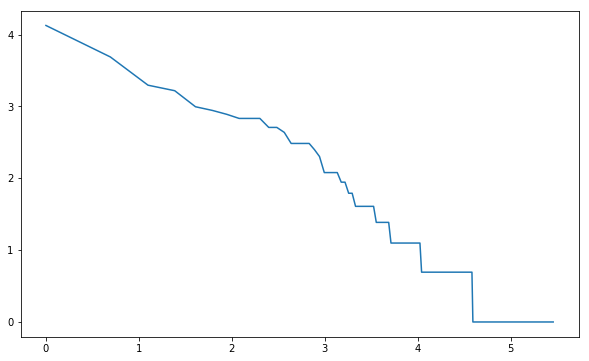

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(v, y)
plt.show()